# **Introduction: Characteristics of Renewable Energy Data**

Renewable energy sources, such as solar and wind power, exhibit **high variance and volatility** due to their dependence on weather conditions. This natural fluctuation makes energy production 

**less predictable**, creating challenges in ensuring a stable and efficient power grid.

To mitigate this variability and **maximize energy production**, the strategic placement and combination of power plants become crucial. An optimal distribution of renewable energy sources can 

**reduce fluctuations and enhance grid stability**, making this an important optimization problem in the energy sector.

---

In [ ]:
### **Solar 1, Wind n**

"""
This section of code processes **a dataset containing one solar energy source and multiple wind energy sources**. Each energy source is **normalized**, and then their **variance** is computed. This variance provides insight into the fluctuations in energy production due to external factors such as weather conditions.

In the dataset:
- **The diagonal elements (self-variance) represent the variance of each energy source individually** and are always **positive**.
- **The off-diagonal elements (cross-variance) capture the variance between different power plants**. 
- These off-diagonal values reflect the **mutual compensatory effect between energy sources**, meaning that certain combinations of power plants can reduce overall variance when selected together.

This information is crucial for **optimizing energy production**, as the goal is to minimize fluctuations by strategically placing and combining power plants.
"""

import json
import numpy as np


# Load precomputed matrices containing variance data
with open(f"./data/matrices5by5.json", "r") as f:
    matrix_5 = json.load(f)

# Convert JSON data to a NumPy array
np.array(matrix_5[0])


array([[ 0.0658492 ,  0.02703027,  0.06400876,  0.05816011, -0.02485329],
       [ 0.02703027,  0.04842342,  0.02703007,  0.02002002, -0.01502243],
       [ 0.06400876,  0.02703007,  0.06320185,  0.05354004, -0.02501211],
       [ 0.05816011,  0.02002002,  0.05354004,  0.06617729, -0.02369893],
       [-0.02485329, -0.01502243, -0.02501211, -0.02369893,  0.08012868]])

In [ ]:
## Generate QUBO matrix

"""
This section generates the **QUBO (Quadratic Unconstrained Binary Optimization) matrix** 
from the processed variance data. The QUBO formulation is used to find the optimal 
combination of power plants that minimizes production variance while maximizing energy output.

Key Parameters:
- **hamming_weight (int):** Number of power plants to be selected.
- **lamb (float):** The weight factor controlling sensitivity to variance (n * sigma).
- **Diagonal Adjustment:** Each diagonal element represents a **normalized production value of 1**, 
  and since the optimization process minimizes the function, it is negated. Additionally, 
  the variance values are converted into standard deviation format by dividing by `hamming_weight`.

The generated QUBO matrix serves as the input for quantum optimization algorithms.
"""

from modules.data_process import data_to_QUBO




## Number of power plants to build
hamming_weight = 3

## Sensitivity to variance (n * sigma)
lamb = 3

## Convert variance data into QUBO format
## - Diagonal: Represents energy production (set to -1 for minimization)
## - Off-diagonal: Varience/hamming weight -> standard deviation, standard deviation*lambda -> Confidence Interval
QUBO_matrix = data_to_QUBO(np.array(matrix_5[0]), hamming_weight, lamb)

## Display the generated QUBO matrix
QUBO_matrix


tensor([[-0.9341508 ,  0.02703027,  0.06400876,  0.05816011, -0.02485329],
        [ 0.02703027, -0.95157658,  0.02703007,  0.02002002, -0.01502243],
        [ 0.06400876,  0.02703007, -0.93679815,  0.05354004, -0.02501211],
        [ 0.05816011,  0.02002002,  0.05354004, -0.93382271, -0.02369893],
        [-0.02485329, -0.01502243, -0.02501211, -0.02369893, -0.91987132]], requires_grad=True)

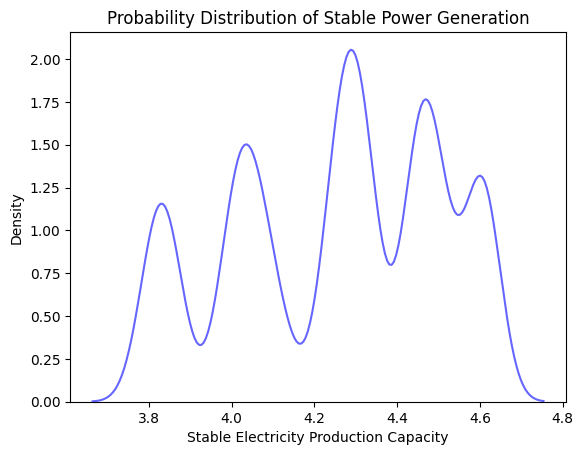

Following results

Best  value   : 4.628477172021516

Average value : 4.254797454757814

Worst value   : 3.788893687434105



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import json

"""
### **Probability Distribution of Stable Power Generation**

This section of code **visualizes the probability distribution of stable electricity production** 
based on different combinations of power plants. 

**Key Insight:**
- The **expected stable electricity production** when selecting **5 power plants** is **reduced from the ideal 5.0** due to variance.
- In the **worst-case scenario, production can drop below 3.8** due to high fluctuations.
- The **best-case scenario** achieves **near-optimal production**

"""

# Load the precomputed variance data
with open(f"./data/matrices10by10.json", "r") as f:
    matrices_data = json.load(f)

# Define the number of selected power plants and the variance penalty factor
hamming_weight = 5
lamb = 3

# Convert variance data into QUBO format
QUBO_matrix_10 = data_to_QUBO(np.array(matrices_data[0]), hamming_weight, lamb)

# Generate all possible selections of 5 power plants from 10
x_list = list(itertools.combinations([i for i in range(len(QUBO_matrix_10))], hamming_weight))

# Compute the effective stable electricity production for each selection
res_list = []
for x in x_list:
    temp = np.array([0] * len(QUBO_matrix_10))
    temp[list(x)] = 1
    res = np.array(temp) @ QUBO_matrix_10 @ np.array(temp)
    res_list.append(res)

# Sort results for better visualization
res_list = sorted(res_list)

# Plot the probability density of stable electricity production
sns.kdeplot(-np.array(res_list), bw_adjust=0.5, color="blue", alpha=0.6)

plt.xlabel("Stable Electricity Production Capacity")
plt.ylabel("Density")
plt.title("Probability Distribution of Stable Power Generation")
plt.show()

# Print the best, average, and worst-case scenarios
print('Following results\n')
print(f'Best  value   : {-np.min(res_list)}\n')   # Maximum stable production
print(f'Average value : {-np.mean(res_list)}\n')  # Average production across selections
print(f'Worst value   : {-np.max(res_list)}\n')   # Minimum stable production (worst-case)


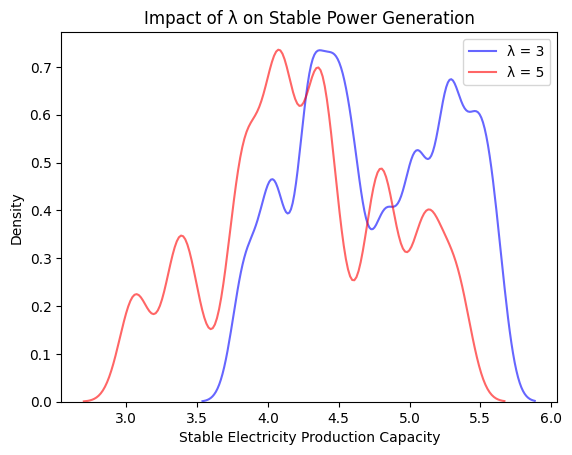

Results for λ = 3

Best  value   : 5.616959161611595

Average value : 4.754797454757813

Worst value   : 3.8057137718889864

Results for λ = 5

Best  value   : 5.3615986026859925

Average value : 4.257995757929689

Worst value   : 3.00952295314831



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import json
import numpy as np

"""
### **Effect of λ on Stable Electricity Production**

This section of code **analyzes how different values of λ (variance sensitivity factor) affect the probability distribution of stable electricity production**. 

**Process:**
1. **Load variance data** and convert it into QUBO format with different λ values (lamb_1 and lamb_2).
2. **Enumerate all possible selections of 5 power plants** from a total of 10.
3. **Compute the impact of variance** on stable electricity production for different λ values.
4. **Compare the probability distributions**:
   - **Blue curve (λ = 3)**
   - **Red curve (λ = 5)**

**Key Insight:**
- As **λ changes, the distribution and expected values shift unpredictably**, making it difficult to foresee the impact on power generation.
- The **optimal production capacity varies significantly with λ**, making it challenging to consistently achieve **maximum efficiency**.
- **The relationship between λ and production stability is highly non-linear**, further complicating the optimization process.

"""

# Load the precomputed variance data
with open(f"./data/matrices10by10.json", "r") as f:
    matrices_data = json.load(f)

# Define parameters
hamming_weight = 5
lamb_1 = 3  # Variance sensitivity factor 1
lamb_2 = 5  # Variance sensitivity factor 2

# Convert variance data into QUBO format with different λ values
QUBO_matrix_1 = data_to_QUBO(np.array(matrices_data[0]), hamming_weight, lamb_1, relative_diff=[2] + [1] * 9)
QUBO_matrix_2 = data_to_QUBO(np.array(matrices_data[0]), hamming_weight, lamb_2, relative_diff=[2] + [1] * 9)

# Generate all possible selections of 5 power plants from 10
x_list = list(itertools.combinations(range(len(QUBO_matrix_1)), hamming_weight))

# Compute the stable electricity production for each selection under different λ values
res_list_1 = []
res_list_2 = []
for x in x_list:
    temp = np.array([0] * len(QUBO_matrix_1))
    temp[list(x)] = 1
    res_1 = np.array(temp) @ QUBO_matrix_1 @ np.array(temp)
    res_2 = np.array(temp) @ QUBO_matrix_2 @ np.array(temp)
    res_list_1.append(res_1)
    res_list_2.append(res_2)

# Sort results for better visualization
res_list_1 = sorted(res_list_1)
res_list_2 = sorted(res_list_2)

# Plot the probability density of stable electricity production for different λ values
sns.kdeplot(-np.array(res_list_1), bw_adjust=0.5, color="blue", alpha=0.6, label="λ = 3")
sns.kdeplot(-np.array(res_list_2), bw_adjust=0.5, color="red", alpha=0.6, label="λ = 5")

plt.xlabel("Stable Electricity Production Capacity")
plt.ylabel("Density")
plt.title("Impact of λ on Stable Power Generation")
plt.legend()
plt.show()

# Print the best, average, and worst-case scenarios for λ = 3
print('Results for λ = 3\n')
print(f'Best  value   : {-np.min(res_list_1)}\n')   # Maximum stable production
print(f'Average value : {-np.mean(res_list_1)}\n')  # Average production across selections
print(f'Worst value   : {-np.max(res_list_1)}\n')   # Minimum stable production (worst-case)

# Print the best, average, and worst-case scenarios for λ = 5
print('Results for λ = 5\n')
print(f'Best  value   : {-np.min(res_list_2)}\n')   # Maximum stable production
print(f'Average value : {-np.mean(res_list_2)}\n')  # Average production across selections
print(f'Worst value   : {-np.max(res_list_2)}\n')   # Minimum stable production (worst-case)
